# Hyperparameters optimization for Logistic Regression

In [3]:
import pandas as pd

DATA = "../data/Customers_clustered.csv"

df_clustered = pd.read_csv(DATA)

df_clustered.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Age,AgeGroup,MntTotal,MntRegularProds,Children,HasChildren,AcceptedCmpTotal,HasAcceptedCmp,NumTotalPurchases,cluster
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,57.0,46-60,1617,1529,0,0,0,0,22,2
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,60.0,46-60,27,21,2,1,0,0,4,0
2,Graduation,Partner,71613.0,0,0,26,426,49,127,111,...,49.0,46-60,776,734,0,0,0,0,20,2
3,Graduation,Partner,26646.0,1,0,26,11,4,20,10,...,30.0,18-30,53,48,1,1,0,0,6,0
4,PhD,Partner,58293.0,1,0,94,173,43,118,46,...,33.0,31-45,422,407,1,1,0,0,14,1


In [4]:
X = df_clustered.drop("Response", axis=1)
y = df_clustered["Response"]

In [5]:
X.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Age,AgeGroup,MntTotal,MntRegularProds,Children,HasChildren,AcceptedCmpTotal,HasAcceptedCmp,NumTotalPurchases,cluster
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,57.0,46-60,1617,1529,0,0,0,0,22,2
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,60.0,46-60,27,21,2,1,0,0,4,0
2,Graduation,Partner,71613.0,0,0,26,426,49,127,111,...,49.0,46-60,776,734,0,0,0,0,20,2
3,Graduation,Partner,26646.0,1,0,26,11,4,20,10,...,30.0,18-30,53,48,1,1,0,0,6,0
4,PhD,Partner,58293.0,1,0,94,173,43,118,46,...,33.0,31-45,422,407,1,1,0,0,14,1


In [6]:
one_hot_cols = [
    "Education",
    "Marital_Status",
    "AgeGroup",
    "HasChildren", 
    "HasAcceptedCmp", 
    "AcceptedCmp2", 
    "AcceptedCmp3", 
    "AcceptedCmp4", 
    "AcceptedCmp5", 
    "Complain",  
    "Kidhome",
    "Teenhome",
    "YearsSinceEnrolled",
    "Children",
    "AcceptedCmpTotal",
    "cluster"
]

standard_cols = [
    "Income",
    "Age"
]

power_cols = X.columns[
    X.columns.str.startswith("Mnt") | X.columns.str.startswith("Num")
].tolist()

minmax_cols = [
    col for col in X.columns if col not in one_hot_cols + standard_cols + power_cols
]


## 🔁 **Reproducing the Model**

In this step, we are building the model **without applying any hyperparameter tuning**, using the algorithm with its **default settings**.



In [7]:
from sklearn.preprocessing import (
    OneHotEncoder,
    StandardScaler,
    MinMaxScaler,
    PowerTransformer,
)
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from imblearn.pipeline import Pipeline  # atenção para o Pipeline do ImbLearn
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_validate

RANDOM_STATE = 42

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)


preprocessing = ColumnTransformer(
      [
          ("one-hot", OneHotEncoder(), one_hot_cols),
          ("standard", StandardScaler(), standard_cols),
          ("minmax", MinMaxScaler(), minmax_cols),
          ("power", PowerTransformer(), power_cols),
      ]
  )

pipeline_logreg = Pipeline(
      [
          ("preprocessing", preprocessing),
          ("feature_selection", SelectKBest(score_func=f_classif, k=10)),
          ("rus", RandomUnderSampler(random_state=RANDOM_STATE)),
          ("model",  LogisticRegression(random_state=RANDOM_STATE)),
      ]
  )

pipeline_logreg.fit(X, y)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('one-hot', OneHotEncoder(),
                                                  ['Education',
                                                   'Marital_Status', 'AgeGroup',
                                                   'HasChildren',
                                                   'HasAcceptedCmp',
                                                   'AcceptedCmp2',
                                                   'AcceptedCmp3',
                                                   'AcceptedCmp4',
                                                   'AcceptedCmp5', 'Complain',
                                                   'Kidhome', 'Teenhome',
                                                   'YearsSinceEnrolled',
                                                   'Children',
                                                   'AcceptedCmpTotal',
                                                   'cluster']),
                                                 ('standard', StandardScaler(),
                                                  ['...
                                                   'MntMeatProducts',
                                                   'MntFishProducts',
                                                   'MntSweetProducts',
                                                   'MntGoldProds',
                                                   'NumDealsPurchases',
                                                   'NumWebPurchases',
                                                   'NumCatalogPurchases',
                                                   'NumStorePurchases',
                                                   'NumWebVisitsMonth',
                                                   'MntTotal',
                                                   'MntRegularProds',
                                                   'NumTotalPurchases'])])),
                ('feature_selection', SelectKBest()),
                ('rus', RandomUnderSampler(random_state=42)),
                ('model', LogisticRegression(random_state=42))])

In [8]:
# antes do preprocessing
len(pipeline_logreg[:-1].feature_names_in_)

35

In [9]:
# dps do preprocessing
len(pipeline_logreg[:-3].get_feature_names_out())

64


**Since we are using only 10 features, the model might be somewhat limited — especially because these features are solely based on the outcomes of previous campaigns. To improve model performance, we can explore adding new features and include them in the hyperparameter tuning process.**


In [10]:
pipeline_logreg[:-1].get_feature_names_out()

array(['one-hot__HasAcceptedCmp_0', 'one-hot__HasAcceptedCmp_1',
       'one-hot__AcceptedCmp3_0', 'one-hot__AcceptedCmp3_1',
       'one-hot__AcceptedCmp5_0', 'one-hot__AcceptedCmp5_1',
       'one-hot__AcceptedCmpTotal_0', 'one-hot__AcceptedCmpTotal_3',
       'minmax__AcceptedCmp1', 'power__NumCatalogPurchases'], dtype=object)


## 📉 **Visualizing ROC Curve Results**

- The **ROC curve** shows how well the model distinguishes between the **positive** and **negative** classes.  
- **Y-axis**: True Positive Rate (how often the model correctly predicts positives).  
- **X-axis**: False Positive Rate (how often the model incorrectly predicts positives).  
- The **AUC (Area Under the Curve)** ranges from **0 to 1** — the **closer to 1**, the **better** the model's performance.


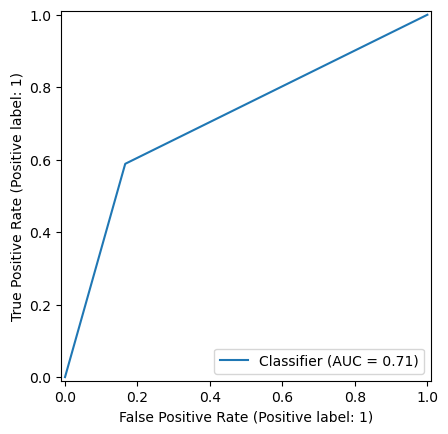

In [11]:
# ROC

from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(pipeline_logreg, X, y, cv=skf, n_jobs=-1)

roc = RocCurveDisplay.from_predictions(y, y_pred)

---

## 📈 **Visualizing Precision-Recall Curve Results**

- The **Precision-Recall curve** evaluates how well the model performs in identifying **positive cases**, which is especially useful for **imbalanced datasets**.  
- It focuses on two key metrics:  
  - **Precision**: Out of all predicted positives, how many were actually correct.  
  - **Recall**: Out of all actual positives, how many were correctly predicted.  
- The **area under the curve**, known as **Average Precision (AP)**, summarizes the performance — the **closer to 1**, the **better** the model is at identifying positives with precision.


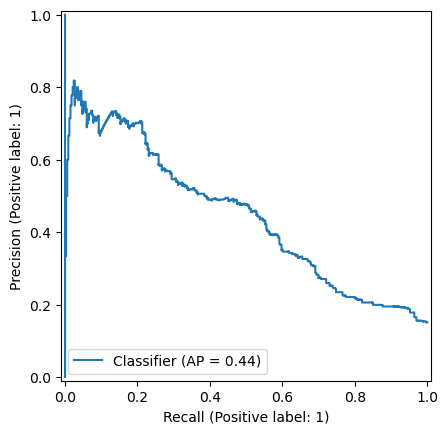

In [12]:
# Precision-Recall

from sklearn.metrics import PrecisionRecallDisplay

y_pred = cross_val_predict(pipeline_logreg, X, y, cv=skf, n_jobs=-1, method="decision_function")

prc = PrecisionRecallDisplay.from_predictions(y, y_pred)


In [13]:
pipeline_logreg.named_steps

{'preprocessing': ColumnTransformer(transformers=[('one-hot', OneHotEncoder(),
                                  ['Education', 'Marital_Status', 'AgeGroup',
                                   'HasChildren', 'HasAcceptedCmp',
                                   'AcceptedCmp2', 'AcceptedCmp3',
                                   'AcceptedCmp4', 'AcceptedCmp5', 'Complain',
                                   'Kidhome', 'Teenhome', 'YearsSinceEnrolled',
                                   'Children', 'AcceptedCmpTotal', 'cluster']),
                                 ('standard', StandardScaler(),
                                  ['Income', 'Age']),
                                 ('minmax', MinMaxScaler(),
                                  ['Recency', 'AcceptedCmp1',
                                   'DaysSinceEnrolled']),
                                 ('power', PowerTransformer(),
                                  ['MntWines', 'MntFruits', 'MntMeatProducts',
                             


## 🧠 **Hyperparameter Selection**

- We use **GridSearchCV** to automatically find the best hyperparameters for our model.  
- **GridSearchCV** is a tool from **Scikit-learn** that systematically tests multiple combinations of parameters to identify the best-performing configuration.  
- In this step, we select the parameters we believe to be the most impactful — those that carry the greatest weight in improving the model’s performance.


In [14]:
import numpy as np
from sklearn.model_selection import GridSearchCV

param_grid = {
    "feature_selection__k": [10, 15, 20, 25],
    "model__C": np.logspace(-3, 3, 7),
    "model__solver": ["liblinear", "lbfgs","saga"],
    "model__penalty": ["l1", "l2", "elasticnet", "none"],
}

grid_search =GridSearchCV(
    pipeline_logreg,
    param_grid,
    scoring=["roc_auc", "average_precision", "accuracy"],
    n_jobs=-1,
    refit="average_precision"
)


### ⚠️ **Ignoring Warnings**

Some warnings may appear during the grid search process due to **invalid combinations of hyperparameters**. These can be safely ignored, as they are expected when testing a wide range of parameter values.

In [15]:
import warnings

warnings.filterwarnings("ignore")

In [16]:
grid_search.fit(X, y)

GridSearchCV(estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('one-hot',
                                                                         OneHotEncoder(),
                                                                         ['Education',
                                                                          'Marital_Status',
                                                                          'AgeGroup',
                                                                          'HasChildren',
                                                                          'HasAcceptedCmp',
                                                                          'AcceptedCmp2',
                                                                          'AcceptedCmp3',
                                                                          'AcceptedCmp4',
                                                                          'AcceptedCmp5',
                                                                          'Complain',
                                                                          'Kidhome',
                                                                          'Teenhome',
                                                                          'YearsSinceEnrolled',
                                                                          'Children',
                                                                          'AcceptedCmpTotal',
                                                                          'cluster']),
                                                                        ('standa...
                                        RandomUnderSampler(random_state=42)),
                                       ('model',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid={'feature_selection__k': [10, 15, 20, 25],
                         'model__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'model__penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'model__solver': ['liblinear', 'lbfgs', 'saga']},
             refit='average_precision',
             scoring=['roc_auc', 'average_precision', 'accuracy'])


## 🔍 **Visualizing GridSearchCV Results**

- The code below returns a **dictionary-like structure** containing the best values found for each model hyperparameter.  
- These parameters were selected based on maximizing the **Precision-Recall metric** (*average_precision*), which is especially useful for imbalanced datasets.


In [17]:
grid_search.best_params_

{'feature_selection__k': 25,
 'model__C': 1000.0,
 'model__penalty': 'l1',
 'model__solver': 'liblinear'}

## Resultado do melhor score
- Esse score e dado pela metrica Precision Recall(Average_precision).

In [18]:
grid_search.best_score_

0.5963641047520366


## 📊 **Visualizing Results**

- We are now visualizing the results of other **evaluation metrics** to further assess the model's performance.


In [19]:
print(*grid_search.cv_results_.keys(), sep="/n")

mean_fit_time/nstd_fit_time/nmean_score_time/nstd_score_time/nparam_feature_selection__k/nparam_model__C/nparam_model__penalty/nparam_model__solver/nparams/nsplit0_test_roc_auc/nsplit1_test_roc_auc/nsplit2_test_roc_auc/nsplit3_test_roc_auc/nsplit4_test_roc_auc/nmean_test_roc_auc/nstd_test_roc_auc/nrank_test_roc_auc/nsplit0_test_average_precision/nsplit1_test_average_precision/nsplit2_test_average_precision/nsplit3_test_average_precision/nsplit4_test_average_precision/nmean_test_average_precision/nstd_test_average_precision/nrank_test_average_precision/nsplit0_test_accuracy/nsplit1_test_accuracy/nsplit2_test_accuracy/nsplit3_test_accuracy/nsplit4_test_accuracy/nmean_test_accuracy/nstd_test_accuracy/nrank_test_accuracy


In [20]:
np.nanmax(grid_search.cv_results_["mean_test_average_precision"])

0.5963641047520366

In [21]:
np.nanmax(grid_search.cv_results_["mean_test_roc_auc"])

0.8671577513502008

In [22]:
np.nanmax(grid_search.cv_results_["mean_test_accuracy"])


0.8489795918367348

In [23]:
grid_search.cv_results_["params"][np.nanargmax(grid_search.cv_results_["mean_test_average_precision"])]

{'feature_selection__k': 25,
 'model__C': 1000.0,
 'model__penalty': 'l1',
 'model__solver': 'liblinear'}

In [24]:
grid_search.cv_results_["params"][np.nanargmax(grid_search.cv_results_["mean_test_roc_auc"])]

{'feature_selection__k': 25,
 'model__C': 100.0,
 'model__penalty': 'l1',
 'model__solver': 'liblinear'}

In [25]:
grid_search.cv_results_["params"][np.nanargmax(grid_search.cv_results_["mean_test_accuracy"])]

{'feature_selection__k': 10,
 'model__C': 0.001,
 'model__penalty': 'l1',
 'model__solver': 'liblinear'}

In [26]:
df_results_gs = pd.DataFrame(
    {
        "auprc": grid_search.cv_results_["mean_test_average_precision"],
        "auroc": grid_search.cv_results_["mean_test_roc_auc"],
        "accuracy": grid_search.cv_results_["mean_test_accuracy"],
    }
)

df_results_gs        

,auprc,auroc,accuracy
0,0.151020,0.500000,0.848980
1,NaN,NaN,NaN
2,0.151020,0.500000,0.848980
3,0.436756,0.764320,0.806349
4,0.438602,0.765582,0.760544
...,...,...,...
331,NaN,NaN,NaN
332,NaN,NaN,NaN
333,NaN,NaN,NaN
334,NaN,NaN,NaN


<Axes: >

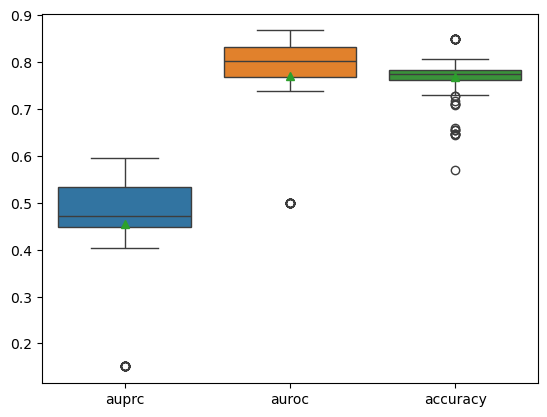

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(
    data=df_results_gs,
    showmeans=True
)


## 🔧 **Building a Pipeline**

- We are creating a pipeline that integrates the **best hyperparameters** selected during the optimization process.  
- The pipeline with the best parameters is a structured framework that organizes all data processing steps — such as **transformation**, **feature selection**, and **model training** — using the best hyperparameter combination found through **GridSearchCV**. This ensures that the final model is trained consistently and optimally, making it ready for predictions.


In [31]:
from sklearn.model_selection import cross_validate

pipeline_logreg_best = Pipeline(
      [
          ("preprocessing", preprocessing),
          ("feature_selection", SelectKBest(score_func=f_classif, k=grid_search.best_params_["feature_selection__k"])),
          ("rus", RandomUnderSampler(random_state=RANDOM_STATE)),
          ("model",  LogisticRegression(
              random_state=RANDOM_STATE,
          C=grid_search.best_params_["model__C"],
          penalty=grid_search.best_params_["model__penalty"],
          solver=grid_search.best_params_["model__solver"],
          ))
      ]
  )

scores = cross_validate(
    pipeline_logreg_best,
    X,
    y,
    cv=skf,
    scoring = ["accuracy", "precision", "recall", "roc_auc", "average_precision"],
    n_jobs=-1
)

In [32]:
pipeline_logreg_best

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('one-hot', OneHotEncoder(),
                                                  ['Education',
                                                   'Marital_Status', 'AgeGroup',
                                                   'HasChildren',
                                                   'HasAcceptedCmp',
                                                   'AcceptedCmp2',
                                                   'AcceptedCmp3',
                                                   'AcceptedCmp4',
                                                   'AcceptedCmp5', 'Complain',
                                                   'Kidhome', 'Teenhome',
                                                   'YearsSinceEnrolled',
                                                   'Children',
                                                   'AcceptedCmpTotal',
                                                   'cluster']),
                                                 ('standard', StandardScaler(),
                                                  ['...
                                                   'MntSweetProducts',
                                                   'MntGoldProds',
                                                   'NumDealsPurchases',
                                                   'NumWebPurchases',
                                                   'NumCatalogPurchases',
                                                   'NumStorePurchases',
                                                   'NumWebVisitsMonth',
                                                   'MntTotal',
                                                   'MntRegularProds',
                                                   'NumTotalPurchases'])])),
                ('feature_selection', SelectKBest(k=25)),
                ('rus', RandomUnderSampler(random_state=42)),
                ('model',
                 LogisticRegression(C=1000.0, penalty='l1', random_state=42,
                                    solver='liblinear'))])


## 📊 **Creating DataFrame**

- We are creating a new feature called **"time"** to track the timing of the process or performance metrics.  
- A **DataFrame** is constructed to store the results of the evaluation metrics for easy comparison and analysis.  
- A **plot** is generated to better visualize the content of the **DataFrame**, helping us to understand the trends and relationships between the results.


In [33]:
scores["time"] = scores["fit_time"] + scores["score_time"]

scores

{'fit_time': array([0.32580805, 0.31275296, 0.19949389, 0.16573381, 0.17678499]),
 'score_time': array([0.11630678, 0.11263871, 0.04392076, 0.04191709, 0.05887699]),
 'test_accuracy': array([0.77777778, 0.77324263, 0.77777778, 0.80272109, 0.75283447]),
 'test_precision': array([0.38345865, 0.368     , 0.38345865, 0.416     , 0.35761589]),
 'test_recall': array([0.76119403, 0.68656716, 0.76119403, 0.78787879, 0.81818182]),
 'test_roc_auc': array([0.88169447, 0.83570117, 0.83456381, 0.89569697, 0.85585859]),
 'test_average_precision': array([0.67854538, 0.57614709, 0.51201525, 0.66451887, 0.57248272]),
 'time': array([0.44211483, 0.42539167, 0.24341464, 0.2076509 , 0.23566198])}

In [34]:
df_scores_best = pd.DataFrame(scores)
df_scores_best

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_roc_auc,test_average_precision,time
0,0.325808,0.116307,0.777778,0.383459,0.761194,0.881694,0.678545,0.442115
1,0.312753,0.112639,0.773243,0.368000,0.686567,0.835701,0.576147,0.425392
2,0.199494,0.043921,0.777778,0.383459,0.761194,0.834564,0.512015,0.243415
3,0.165734,0.041917,0.802721,0.416000,0.787879,0.895697,0.664519,0.207651
4,0.176785,0.058877,0.752834,0.357616,0.818182,0.855859,0.572483,0.235662


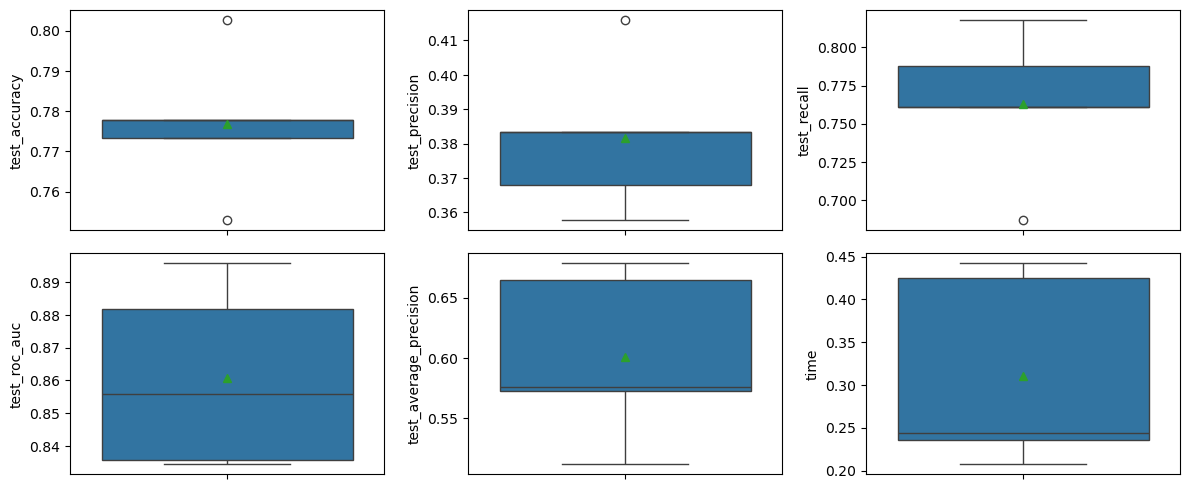

In [35]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 5), tight_layout=True)

cols = df_scores_best.columns[2:].to_list()

for ax, col in zip(axs.flatten(), cols):
    b = sns.boxplot(y=col, data=df_scores_best, ax=ax, showmeans=True)

plt.show()

In [36]:
pipeline_logreg_best.fit(X, y)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('one-hot', OneHotEncoder(),
                                                  ['Education',
                                                   'Marital_Status', 'AgeGroup',
                                                   'HasChildren',
                                                   'HasAcceptedCmp',
                                                   'AcceptedCmp2',
                                                   'AcceptedCmp3',
                                                   'AcceptedCmp4',
                                                   'AcceptedCmp5', 'Complain',
                                                   'Kidhome', 'Teenhome',
                                                   'YearsSinceEnrolled',
                                                   'Children',
                                                   'AcceptedCmpTotal',
                                                   'cluster']),
                                                 ('standard', StandardScaler(),
                                                  ['...
                                                   'MntSweetProducts',
                                                   'MntGoldProds',
                                                   'NumDealsPurchases',
                                                   'NumWebPurchases',
                                                   'NumCatalogPurchases',
                                                   'NumStorePurchases',
                                                   'NumWebVisitsMonth',
                                                   'MntTotal',
                                                   'MntRegularProds',
                                                   'NumTotalPurchases'])])),
                ('feature_selection', SelectKBest(k=25)),
                ('rus', RandomUnderSampler(random_state=42)),
                ('model',
                 LogisticRegression(C=1000.0, penalty='l1', random_state=42,
                                    solver='liblinear'))])


### **Selected 25 Important Features for the Model by GridSearchCV**

- We have selected the **25 most important features** for the model, based on the results provided by **GridSearchCV**. These features were identified as having the most significant impact on model performance and are now being used to train the final model.


In [37]:
names = pipeline_logreg_best[:-1].get_feature_names_out()
names

array(['one-hot__HasChildren_0', 'one-hot__HasChildren_1',
       'one-hot__HasAcceptedCmp_0', 'one-hot__HasAcceptedCmp_1',
       'one-hot__AcceptedCmp3_0', 'one-hot__AcceptedCmp3_1',
       'one-hot__AcceptedCmp4_0', 'one-hot__AcceptedCmp4_1',
       'one-hot__AcceptedCmp5_0', 'one-hot__AcceptedCmp5_1',
       'one-hot__Children_0', 'one-hot__AcceptedCmpTotal_0',
       'one-hot__AcceptedCmpTotal_1', 'one-hot__AcceptedCmpTotal_2',
       'one-hot__AcceptedCmpTotal_3', 'one-hot__cluster_2',
       'standard__Income', 'minmax__Recency', 'minmax__AcceptedCmp1',
       'minmax__DaysSinceEnrolled', 'power__MntWines',
       'power__MntMeatProducts', 'power__NumCatalogPurchases',
       'power__MntTotal', 'power__MntRegularProds'], dtype=object)

In [39]:
importance = pipeline_logreg_best["model"].coef_[0]

In [42]:
df_importance = pd.DataFrame(
    {
        "name": names,
        "importance": importance,
    }
)

df_importance.sort_values(by="importance")

,name,importance
12,one-hot__AcceptedCmpTotal_1,-5.644352
13,one-hot__AcceptedCmpTotal_2,-4.427358
14,one-hot__AcceptedCmpTotal_3,-3.677768
17,minmax__Recency,-3.098227
24,power__MntRegularProds,-1.833398
11,one-hot__AcceptedCmpTotal_0,-1.804431
2,one-hot__HasAcceptedCmp_0,-1.243222
15,one-hot__cluster_2,-0.732624
20,power__MntWines,-0.354598
16,standard__Income,-0.071299



## **Observing Improvements in the Model**

In the **first chart**, we can observe an improvement in the **Area Under the Curve (AUC)** metric.  
- The model's performance increased from **71** (before hyperparameter optimization) to **77** (after optimization).

In the **second chart**, a significant improvement is also seen in the **Precision-Recall (Average Precision - AP)** metric.  
- The value rose from **41** to **57**, indicating that the model has become better at identifying positive cases, particularly in an imbalanced dataset scenario.


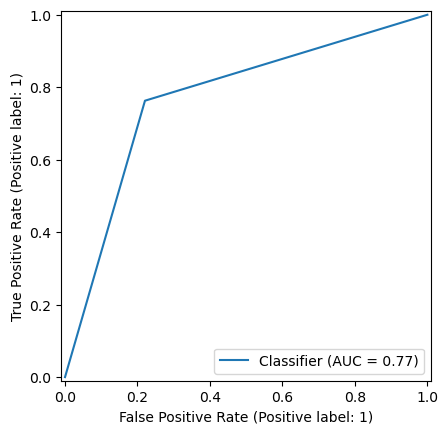

In [44]:
# ROC

from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(pipeline_logreg_best, X, y, cv=skf, n_jobs=-1)

roc = RocCurveDisplay.from_predictions(y, y_pred)

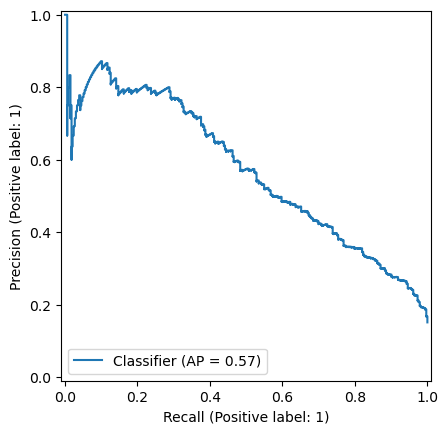

In [45]:
# Precision-Recall
from sklearn.metrics import PrecisionRecallDisplay

y_pred = cross_val_predict(pipeline_logreg_best, X, y, cv=skf, n_jobs=-1, method="decision_function")

prc = PrecisionRecallDisplay.from_predictions(y, y_pred)